#Setup 

In [ ]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Instaling Kaggle to get access to data
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Api token to get access to kaggle datasets
from google.colab import files
files.upload()

In [ ]:
#Directory
!pwd

/content


In [ ]:
#Directory configuration
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
#download the data
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 113MB/s]


In [ ]:
#function to extrac files from a .zip file
from zipfile import ZipFile 

def open_zipfile(file_name):
  with ZipFile(file_name, 'r') as zip:
    
    zip.printdir()
    zip.extractall()
  

In [ ]:
#apply open_zipfile funtion 
open_zipfile('new-york-city-airbnb-open-data.zip')

File Name                                             Modified             Size
AB_NYC_2019.csv                                2019-10-27 22:06:18      7077973
New_York_City_.png                             2019-10-27 22:06:20       192340


In [ ]:
#Read the csv file with pandas
dataset = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
#Dataset structure visualization
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#EDA

Look at the price variable. Does it have a long tail?

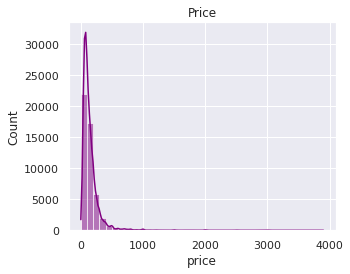

In [ ]:
#Price variable histogram
plt.figure(figsize=(10,13))
sns.set(font_scale = 1, style = 'darkgrid')
ax= [None for _ in range(1)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)


sns.histplot(data= dataset[dataset['price']< 4000], x = 'price',color = 'purple', alpha = 0.5 , binwidth = 100,kde = True, ax=ax[0])
ax[0].set_title('Price')
plt.show()

#Features
For the rest of the homework, you'll need to use only these columns:

* 'latitude',
* 'longitude',
* 'price',
* 'minimum_nights',
* 'number_of_reviews',
* 'reviews_per_month',
* 'calculated_host_listings_count',
* 'availability_365'

Select only them.

In [ ]:
#Important columns list
important_columns = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#Selection columns in the dataset
dataset = dataset[important_columns]

In [ ]:
#Changes visualization
dataset.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


#Question 1
Find a feature with missing values. How many missing values does it have?

In [ ]:
#Find missing values
dataset.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

reviews_per_month is the feature with missing values with 10052 missing values.

#Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [ ]:
#Media 
dataset['minimum_nights'].quantile(q=.50)
#or
#np.median(dataset['minimum_nights'])

3.0

* Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.

In [ ]:
#Split the data
X = dataset.iloc[:, [0,1,3,4,5,6,7]]
#Make sure that the target value ('price') is not in your dataframe
y = dataset.iloc[:, [2]]

In [ ]:
# Apply the log transformation to the price variable using the np.log1p() function.
y = np.log1p(y)

In [ ]:
#What length the validation and test sets should have?
len(X)*.20

9779.0

In [ ]:
#Shuffle the initial dataset, use seed 42.
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=42, shuffle= True)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=.50, random_state=42, shuffle= True)

In [ ]:
#Datasets length visualization
len(X_validation), len(X_test)

(9779, 9779)

# Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without * regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [ ]:
#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.
#Try both options

#Preparing datasets

#Trainsets
X_train_0 = X_train.copy()
X_train_mean = X_train.copy()

average = X_train['reviews_per_month'].mean()
X_train_0['reviews_per_month'] = X_train_0['reviews_per_month'].fillna(value= 0 )
X_train_mean['reviews_per_month'] = X_train_mean['reviews_per_month'].fillna(value=average)

#Validation sets
X_validation_0 = X_validation.copy()
X_validation_mean = X_validation.copy()

X_validation_0['reviews_per_month'] = X_validation['reviews_per_month'].fillna(value = 0)
X_validation_mean['reviews_per_month'] = X_validation['reviews_per_month'].fillna(value = average)

In [ ]:
#Some statistics about the data 
average, X_train_0['reviews_per_month'].mean(), X_train_mean['reviews_per_month'].mean()

(1.3785596247364116, 1.0919177148311006, 1.3785596247364116)

In [ ]:
#Function to train a linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
#Function calculate the root mean square error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [ ]:
#Training a linear regression model with X_train_0, y_trai
w_0_null, w_null = train_linear_regression(X_train_0.values, y_train.values)

In [ ]:
X_validation_0 = X_validation_0.values

In [ ]:
#Making predictions
y_null_pred_val = w_0_null[0] + X_validation_0.dot(w_null)

In [ ]:
#Calculating the rmse
np.round(rmse(y_validation.values, y_null_pred_val),2)

0.64

In [ ]:
#Training a linear regression model with X_train_mean, y_train
w_0_mean, w_mean = train_linear_regression(X_train_mean.values, y_train.values)

In [ ]:
X_validation_mean = X_validation_mean.values

In [ ]:
#Making predictions
y_mean_pred_val = w_0_mean[0] + X_validation_mean.dot(w_mean)

In [ ]:
#calculating the rmse
np.round(rmse(y_validation.values, y_mean_pred_val),2)

0.64

Which option gives better RMSE?

There is not a best option, the both have the same rmse

#Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

In [ ]:
# Regularized linear regression model 
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
# For this question, fill the NAs with 0.
#Preparing data 
X_train_0 = X_train.copy()
X_validation_0 = X_validation.copy()

X_train_0['reviews_per_month'] = X_train_0['reviews_per_month'].fillna(value= 0 )
X_validation_0['reviews_per_month'] = X_validation['reviews_per_month'].fillna(value = 0)

In [ ]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
X_validation_0 = X_validation_0.values

In [ ]:
for r in r_values:
  w_0, w = train_linear_regression_reg(X_train_0.values, y_train.values, r)
  #Making predictions
  y_pred_val = w_0[0] + X_validation_0.dot(w)
  #Calculatin the rmse
  mse = np.round(rmse(y_validation.values, y_pred_val),2)
  print(r, w_0[0], mse)


0 -440.3826961243489 0.64
1e-06 -440.3291441592916 0.64
0.0001 -435.0911969705565 0.64
0.001 -392.631550533064 0.64
0.01 -198.71192642352295 0.65
0.1 -33.457856555731354 0.67
1 -3.5900562246085874 0.67
5 -0.7215924137017069 0.67
10 -0.3604187944348182 0.67


Which r gives the best RMSE?

If there are multiple options, select the smallest r.

r = 0.1 gives the best results

# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
* Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. 
* If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [ ]:
# Split the data
X = dataset.iloc[:, [0,1,3,4,5,6,7]]
#Make sure that the target value ('price') is not in your dataframe
y = dataset.iloc[:, [2]]

In [ ]:
#Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rsme_list = [ ]
for seed in seed_values:

  #For each seed, do the train/validation/test split with 60%/20%/20% distribution.
  #split data into train and test sets with relation [60,40]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=seed, shuffle= True)
  #split data into test and validations sets with relation [50,50]
  X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=.50, random_state=seed, shuffle= True)

  #Fill the missing values with 0 and train a model without regularization.
  #Preparing data 

  X_train['reviews_per_month'] = X_train['reviews_per_month'].fillna(value= 0 )
  X_validation['reviews_per_month'] = X_validation['reviews_per_month'].fillna(value = 0)

  #For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
  w_0, w = train_linear_regression(X_train.values, y_train.values)
  #making predictions
  y_pred_val = w_0[0] + X_validation.dot(w)
  #calculatin the rmse
  mse = np.round(rmse(y_validation.values, y_pred_val.values),2)
  
  #For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
  rsme_list.append(mse)

  print(seed, w_0[0],mse)

#What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
#Round the result to 3 decimal digits (round(std, 3))
print(np.round(np.std(rsme_list),3))


0 -66403.52568286206 210.63
1 -70120.23942409984 248.64
2 -68964.3889834153 214.05
3 -66460.10260934445 220.97
4 -67192.93286146232 258.06
5 -66584.359115719 257.93
6 -65971.8862354357 245.4
7 -68764.4814422817 183.04
8 -67356.47892169602 175.38
9 -69246.58980530531 227.69
27.782


#Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [ ]:
# Split the data
X = dataset.iloc[:, [0,1,3,4,5,6,7]]
#Make sure that the target value ('price') is not in your dataframe
y = dataset.iloc[:, [2]]
y = np.log1p(y)

In [ ]:
#For each seed, do the train/validation/test split with 60%/20%/20% distribution.
#split data into train and test sets with relation [60,40]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=9, shuffle= True)

In [ ]:
#Fill the missing values with 0 
X_train['reviews_per_month'] = X_train['reviews_per_month'].fillna(value= 0 )
X_test['reviews_per_month'] = X_test['reviews_per_month'].fillna(value = 0)

In [ ]:
#Train a model with r=0.001
w_0, w = train_linear_regression_reg(X_train.values, y_train.values, r = 0.01)

In [ ]:
X_test = X_test.values

In [ ]:
y_pred_val = w_0[0] + X_test.dot(w)

In [ ]:
#What's the RMSE on the test dataset?
np.round(rmse(y_test.values, y_pred_val),2)

0.66